In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from read_file import *
import os

## Données et comparaison des 2 méthodes

In [2]:
## Loading data
n = 200
p = 6
filename = f"./data/2KP200-TA-0.dat"

w=np.zeros(n,dtype=int) # poids des objets
v=np.zeros((n,p),dtype=int) # utilités des objets
W = readFile(filename,w,v)

# ====== On prend un sous-ensemble du problème ====
n = 50
p = 3
w = w[:n]
v = v[:n,:p]
W = w.sum()//2
print(w.shape, v.shape, W)

(50,) (50, 3) 13299


In [6]:
from time import time
params = (n,p,v,w,W)

def gap(opt, sol):
    return (opt - sol)*100 / opt

def value(x, v):
    print(x.shape)
    return v[x==1, :].sum(0)

def step(params, mode='EU', m = 20, verbose=False):
    DM = DecisionMaker(p, mode)
    DM_opt = DM.get_opt(params)
    print('Optimal: ', value(DM_opt[0], params[2]))

    # Procedure 1
    DM.nb_questions
    print('Procedure 1')
    tps = time()
    opt = RBGS(m, params, mode=mode, DM=DM, verbose=verbose)
    tps = time() - tps
    n = DM.nb_questions
    g = gap(DM_opt[1], DM.value(opt))
    res1 = (n, g, tps)
    
    DM.nb_questions = 0

    #Procedure 2
    print('Procedure 2')
    tps = time()
    opt = RBLS(params, mode=mode, DM=DM, verbose=verbose)
    tps = time() - tps
    n = DM.nb_questions
    g = gap(DM_opt[1], DM.value(opt))
    res2 = (n, g, tps)
    
    DM.nb_questions = 0
    return res1, res2

P1 = []
P2 = []
mode = 'EU'
m = 20

for it in range(20):
    print(f'======= {it = } ========')
    res1, res2 = step(params, mode, m, verbose=True)
    P1.append(res1)
    P2.append(res2)

======= it = 0 ========
(50,)
Optimal:  [20929 19710 17630]
Procedure 1
Init EU Model
it = 1 | regret = 0.23 | [20260 19926 18312] [18773 20937 16314]
it = 2 | regret = 0.18 | [20016 19505 18468] [18315 18375 19253]
it = 3 | regret = 0.09 | [20260 19926 18312] [18411 20722 17940]
it = 4 | regret = 0.08 | [20260 19926 18312] [21332 18308 17456]
it = 5 | regret = 0.08 | [20260 19926 18312] [19562 18331 19149]
it = 6 | regret = 0.07 | [20260 19926 18312] [20923 19777 15622]
it = 7 | regret = 0.05 | [20260 19926 18312] [20929 19710 17630]
it = 8 | regret = 0.03 | [20929 19710 17630] [19681 20613 16803]
it = 9 | regret = 0.02 | [20929 19710 17630] [20544 18165 18500]
it = 10 | regret = 0.01 | [20929 19710 17630] [20939 19107 17886]
it = 11 | regret = 0.01 | [20929 19710 17630] [20750 20004 16453]
it = 12 | regret = 0.00 | [20929 19710 17630] [19681 20613 16803]
Procedure 2
Init EU Model
it = 0 | voisins: 267
solution: 0.2938430902671807
[19219 17739 15598]

it = 1 | voisins: 293
solution: 0

======= it = 9 ========
(50,)
Optimal:  [18804 20057 18535]
Procedure 1
Init EU Model
it = 1 | regret = 0.26 | [20260 19926 18312] [18773 20937 16314]
it = 2 | regret = 0.20 | [20016 19505 18468] [18315 18375 19253]
it = 3 | regret = 0.10 | [20260 19926 18312] [18411 20722 17940]
it = 4 | regret = 0.10 | [20260 19926 18312] [21332 18308 17456]
it = 5 | regret = 0.09 | [20260 19926 18312] [19562 18331 19149]
it = 6 | regret = 0.08 | [20260 19926 18312] [20750 20004 16453]
it = 7 | regret = 0.05 | [20260 19926 18312] [20929 19710 17630]
it = 8 | regret = 0.03 | [20260 19926 18312] [20544 18165 18500]
it = 9 | regret = 0.03 | [20260 19926 18312] [18804 20057 18535]
it = 10 | regret = 0.02 | [18804 20057 18535] [19376 18691 19154]
it = 11 | regret =-0.00 | [18804 20057 18535] [19376 18691 19154]
Procedure 2
Init EU Model
it = 0 | voisins: 267
solution: 0.22649854750284554
[18021 17896 16680]

it = 1 | voisins: 281
solution: 0.1416901757386377
[17402 18387 16650]

it = 2 | voisins: 513
solu

======= it = 18 ========
(50,)
Optimal:  [20750 20004 16453]
Procedure 1
Init EU Model
it = 1 | regret = 0.23 | [20260 19926 18312] [18773 20937 16314]
it = 2 | regret = 0.18 | [20016 19505 18468] [18315 18375 19253]
it = 3 | regret = 0.09 | [20260 19926 18312] [18411 20722 17940]
it = 4 | regret = 0.08 | [20260 19926 18312] [21332 18308 17456]
it = 5 | regret = 0.08 | [20260 19926 18312] [19562 18331 19149]
it = 6 | regret = 0.07 | [20260 19926 18312] [20923 19777 15622]
it = 7 | regret = 0.05 | [20260 19926 18312] [20929 19710 17630]
it = 8 | regret = 0.03 | [20929 19710 17630] [19681 20613 16803]
it = 9 | regret = 0.01 | [19681 20613 16803] [20750 20004 16453]
it = 10 | regret = 0.00 | [20750 20004 16453] [20750 20004 16453]
Procedure 2
Init EU Model
it = 0 | voisins: 267
solution: 0.11489560134803066
[18186 18443 15988]

it = 1 | voisins: 436
solution: 0.15002268713898273
[18182 18903 15517]

it = 2 | voisins: 413
solution: 0.1301217266018187
[17443 19550 15564]

it = 3 | voisins: 

In [7]:
# nb_queries, gap, time
P1 = np.array(P1)
P2 = np.array(P2)

In [8]:
P1 = np.array(P1)
P2 = np.array(P2)
np.savetxt('P1.txt', P1)
np.savetxt('P2.txt', P2)

In [16]:
n1, g1, t1 = P1.mean(0).round(3)
print(f'P1: number of queries: {n} | error: {g} | time: {t} ')
n2, g2, t2 = P2.mean(0).round(3)
print(f'P2: number of queries: {n} | error: {g} | time: {t} ')

P1: number of queries: 11.25 | error: 7.682 | time: 4.958 
P2: number of queries: 11.25 | error: 7.682 | time: 4.958 


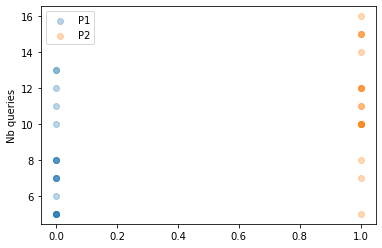

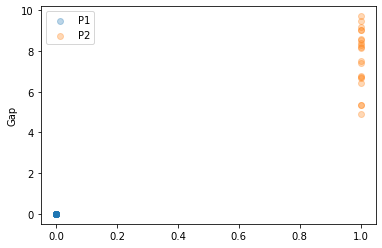

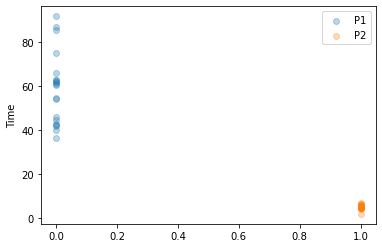

In [21]:
L = ['Nb queries', 'Gap', 'Time']
for i in range(3):
    xaxis = np.zeros(20)
    plt.scatter(xaxis, P1[:,i], alpha=0.3, label='P1')
    plt.scatter(xaxis+1, P2[:,i], alpha=0.3, label='P2')
    plt.ylabel(L[i])
    plt.legend()
    plt.show()